In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Read dataset

In [2]:
df = pd.read_csv("../data/vgsales_eda2_ready.csv", sep=",")
print ('Input shape',df.shape)  # (7524, 21)
df.head()

#df = df[df['oem']!= 'Others']
#df.shape

Input shape (8478, 85)


,Name,Platform,Genre,Global_Sales,game_key,Name_meta,Genre_meta,Score_pro,Score_user,Publisher,...,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy,genre_Visual+Novel,labels
0,Grand Theft Auto: San Andreas,XB,Action,1.95,grand-theft-auto-san-andreas,Grand Theft Auto: San Andreas,"Action Adventure, Modern",9.3,8.8,rockstar games,...,0,0,0,0,0,0,0,0,0,5
1,Grand Theft Auto: San Andreas,PC,Action,0.97,grand-theft-auto-san-andreas,Grand Theft Auto: San Andreas,"Action Adventure, Modern, Modern, Open-World",9.3,8.9,rockstar games,...,0,0,0,0,0,0,0,0,0,0
2,Grand Theft Auto: Vice City,PC,Action,0.04,grand-theft-auto-vice-city,Grand Theft Auto: Vice City,"Action Adventure, Modern, Modern, Open-World",9.4,8.8,rockstar games,...,0,0,0,0,0,0,0,0,0,0
3,Grand Theft Auto III,PC,Action,0.01,grand-theft-auto-iii,Grand Theft Auto III,"Action Adventure, Modern, Modern, Open-World",9.3,8.2,rockstar games,...,0,0,0,0,0,0,0,0,0,0
4,Grand Theft Auto IV,PC,Action,0.87,grand-theft-auto-iv,Grand Theft Auto IV,"Action Adventure, Modern, Modern, Open-World",9.0,7.0,rockstar games,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Séparer les variables explicatives de la variable à prédire
bins=8
target = pd.qcut(df['Global_Sales'],q=bins, labels=[i for i in range(0,bins)]).astype('int64')

data = df.select_dtypes(exclude='object').drop(['Global_Sales','Global_Sales.log','year',
                                               #'day', 'year', 'month', 'quarter', 'anom',
                                               ],axis=1)

data.columns

Index(['Score_pro', 'Score_user', 'N_pro', 'N_user', 'compound', 'N_pro.log',
       'N_user.log', 'PC', 'nintendo', 'playstation', 'xbox', 'pub_activision',
       'pub_amc games', 'pub_capcom', 'pub_ea games', 'pub_ea sports',
       'pub_electronic arts', 'pub_konami', 'pub_nintendo', 'pub_scea',
       'pub_sega', 'pub_thq', 'pub_ubisoft', 'lic_FIFA', 'lic_Final Fantasy',
       'lic_Harry Potter', 'lic_Marvel', 'lic_NBA', 'lic_Others',
       'lic_Prince of Persia', 'lic_Sonic The Hedgehog', 'lic_Star Wars',
       'lic_The Sims', 'lic_Tom Clancy’s', 'lic_WWE', 'year.release_2001',
       'year.release_2002', 'year.release_2003', 'year.release_2004',
       'year.release_2005', 'year.release_2006', 'year.release_2007',
       'year.release_2008', 'year.release_2009', 'year.release_2010',
       'year.release_2011', 'year.release_2012', 'year.release_2013',
       'year.release_2014', 'year.release_2015', 'year.release_2016',
       'year.release_2017', 'year.release_2018', 'genre_

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       242
           1       0.32      0.29      0.30       173
           2       0.29      0.41      0.34       207
           3       0.28      0.26      0.27       194
           4       0.36      0.25      0.29       198
           5       0.35      0.28      0.31       239
           6       0.42      0.41      0.41       217
           7       0.63      0.73      0.68       226

    accuracy                           0.43      1696
   macro avg       0.41      0.41      0.41      1696
weighted avg       0.42      0.43      0.42      1696



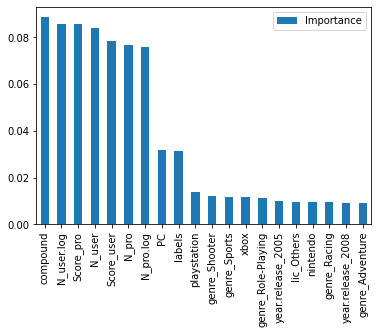

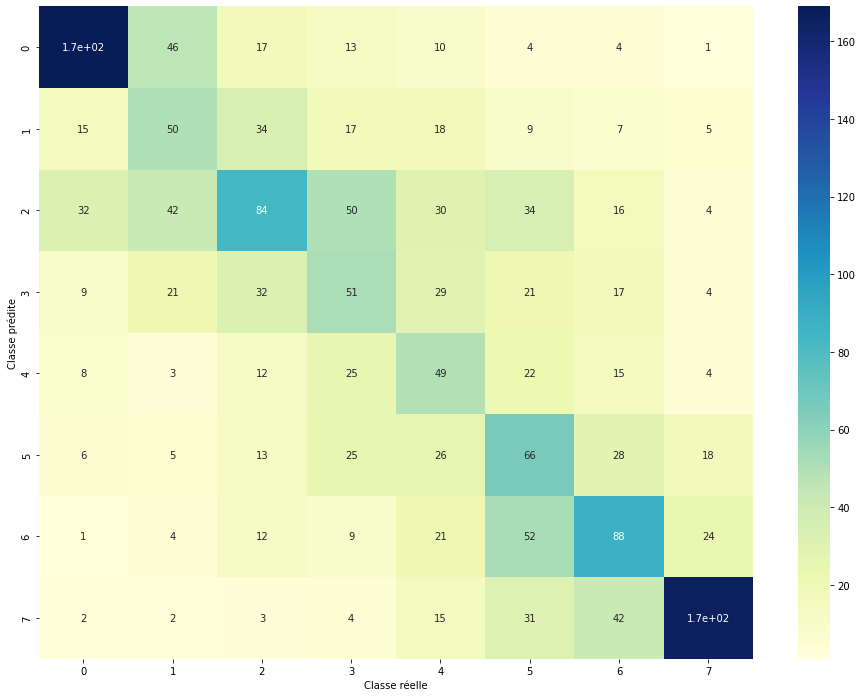

In [116]:
# Séparer le jeu de données en données d'entraînement et données test 
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=0)

# Créer un classificateur clf et entraîner le modèle sur l'ensemble d'entraînement
# GradientBoostingClassifier, RandomForestClassifier, DecisionTreeClassifier
clf = RandomForestClassifier().fit(X_train, y_train)

# Calculer les prédictions 
y_pred = clf.predict(X_test)

feats = {}
for feature, importance in zip(data.columns, clf.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats , orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(20).plot.bar();

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )
#sns.heatmap( pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap= 'GnBu', cbar=False,ax=axes[0])


# Calcul et affichage de la matrice de confusion
contingency_matrix  = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(contingency_matrix.T, annot=True, cmap="YlGnBu", cbar=True, ax=ax);

In [117]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.42629716981132076)